<a href="https://colab.research.google.com/github/keyvanforwork/deep-learning-with-TensorFlow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to regression with neural network in tensorflow

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


### Creating data to view and fit

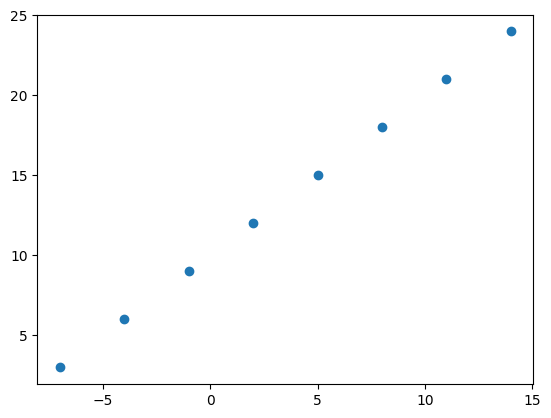

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y);

In [ ]:
assert y[0] == X[0] + 10

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939_700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
print(X.ndim)    #vector
print(X[0].ndim) #scaler

1
0


In [ ]:
x = tf.cast(tf.constant(X), dtype=tf.float32)
y= tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

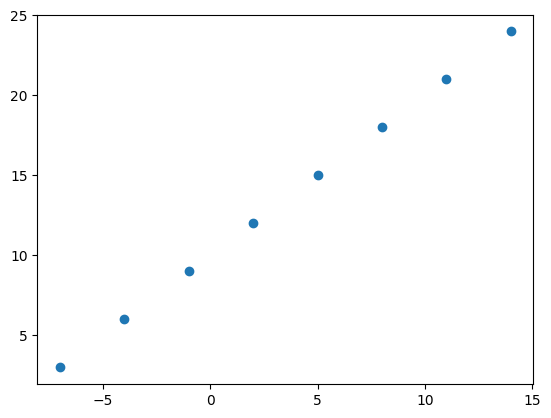

In [ ]:
plt.scatter(x, y);

### Create first model

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x[..., tf.newaxis], y, epochs=5)
# model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 593ms/step - loss: 21.9791 - mae: 21.9791
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 21.5859 - mae: 21.5859
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 21.1928 - mae: 21.1928
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 20.7997 - mae: 20.7997
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 20.4349 - mae: 20.4349


In [ ]:
# Prediction with using our model
y_pred = model.predict([17.0]) # actual=27
y_pred

1/1 [==============================] - 0s 149ms/step


array([[-24.013052]], dtype=float32)

### Improve our model
1. **creating a model** ==> more layers-more hidden layers-change the activation func
2. **compiling a model** ==> change the optimization func-learning rate
3. **fitting a model** ==> more epochs-more data


In [ ]:
# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss="mae",  # tf.keras.losses.mae
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(x[..., tf.newaxis], y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 13.4773 - mae: 13.4773
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 10.5348 - mae: 10.5348
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 7.8401 - mae: 7.8401
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.0531 - mae: 4.0531
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.7495 - mae: 7.7495
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.1887 - mae: 7.1887
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 5.2622 - mae: 5.2622
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.8690 - mae: 3.8690
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 5.1240 - mae: 5.1240
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.8887 - mae: 5.8887
Epoch 11/1000
1/1 [==============================] - 0s 1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Prediction
y_pred = model.predict([17.0, 22]) # actual=27, 32
y_pred

1/1 [==============================] - 0s 316ms/step


array([[26.377329],
       [31.365429]], dtype=float32)

In [ ]:
# X = tf.constant([2., 5., 6.2, 8.7, 9.4, 6.7, 7.3, 8.2, 1.4, 3.4])
# y = tf.constant([5.6, 8.4, 5.1, 1.7, 8.2, 3.1, 2.6, 7.5, 8.1, 3.4])

# # 1. Create the model
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(1))

# # 2. Compile the model
# model.compile(loss="mae",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               metrics=["mae"])

# # 3. Fit the model
# model.fit(X[..., tf.newaxis], y, epochs=1000)

In [ ]:
# Prediction
# model_pred = model.predict([2.0, 1.76])
# model_pred

### Evaluating a model

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

In [ ]:
# Biger the dataset
X = tf.range(-100, 100)
y = X + 10

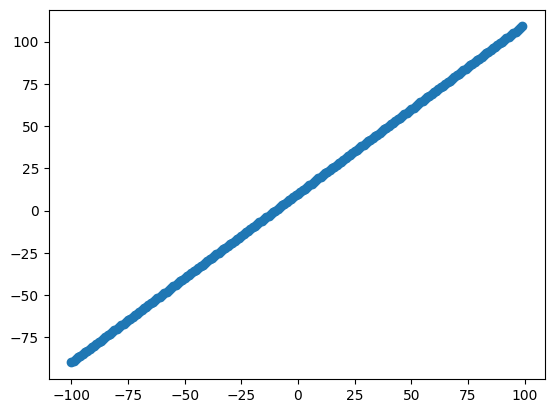

In [ ]:
# Visulize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);




*   Training set
*   Validation set
*   Test set






In [ ]:
len(X)

200

In [ ]:
x_train = X[:160]
y_train = y[:160]
x_test = X[160:]
y_test = y[160:]

len(x_train), len(x_test)

(160, 40)

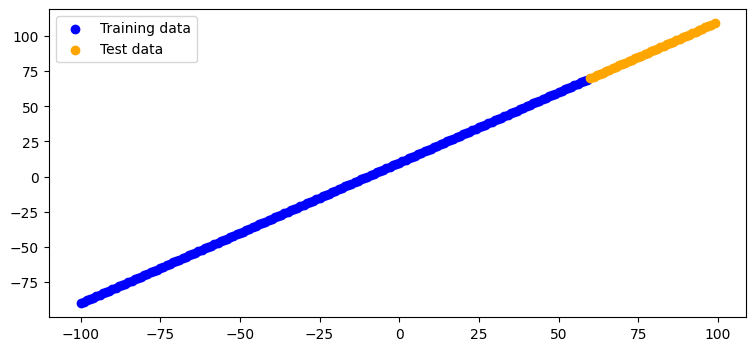

In [ ]:
# Visulize the data
plt.figure(figsize=(9, 4))
plt.scatter(x_train, y_train, c="blue", label="Training data")
plt.scatter(x_test, y_test, c="orange", label="Test data")
plt.legend()
plt.show()

In [ ]:
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(x_train[..., tf.newaxis], y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 28ms/step - loss: 52.0352 - mae: 52.0352
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 10.3972 - mae: 10.3972
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 10.5697 - mae: 10.5697
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 9.4836 - mae: 9.4836
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 10.4017 - mae: 10.4017
Epoch 6/100
5/5 [==============================] - 0s 35ms/step - loss: 10.6763 - mae: 10.6763
Epoch 7/100
5/5 [==============================] - 0s 29ms/step - loss: 10.7203 - mae: 10.7203
Epoch 8/100
5/5 [==============================] - 0s 25ms/step - loss: 10.2782 - mae: 10.2782
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 11.3198 - mae: 11.3198
Epoch 10/100
5/5 [==============================] - 0s 25ms/step - loss: 10.0112 - mae: 10.0112
Epoch 11/100
5/5 [==============================] -

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (32, 1)                   2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model built automatically by define input_shape

# 1. Create the model
model = tf.keras.Sequential(name="Model01")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"))
model.add(tf.keras.layers.Dense(1, name="Output_layer"))


# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "Model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


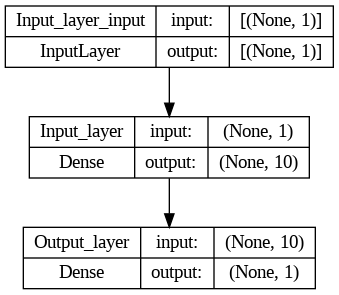

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualize our model's predictions

(`y_test` or `y_true`) against `y_pred`

In [ ]:
y_pred = model.predict(x_test)
print(y_test[:5])
print(y_pred[:5])

2/2 [==============================] - 0s 8ms/step
tf.Tensor([70 71 72 73 74], shape=(5,), dtype=int32)
[[38.480747]
 [39.062794]
 [39.64484 ]
 [40.226887]
 [40.80894 ]]


In [ ]:
# Creat a plotind function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data, test data and compare predictions to truth labels
  """
  import matplotlib.pyplot as plt
  plt.figure(figsize=(9, 6))
  plt.scatter(train_data, train_labels, c="blue", label="Training data")
  plt.scatter(test_data, test_labels, c="orange", label="Testing data")
  plt.scatter(test_data, predictions, c="red", label="Predictions")
  plt.legend()
  plt.show()

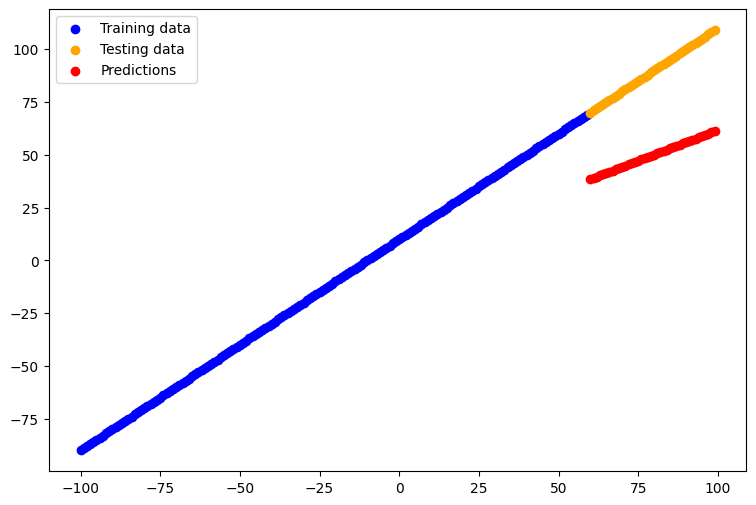

In [ ]:
plot_predictions()

In [ ]:
# Example
x = tf.range(-100, 100)
y = x + 12
x_train = x[:160]
y_train = y[:160]
x_test = x[160:]
y_test = y[160:]

# 1. Create the model
model = tf.keras.Sequential(name="sample_model_01")
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation=None))

# 2. Compile the model
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mse")

# 3. Fit the model
model.fit(x_train[..., tf.newaxis], y_train[..., tf.newaxis], epochs=1000, verbose=0)

In [ ]:
# Prediction
y_pred = model.predict(x_test)
print(x_test[:6])
print(y_pred[:6])

2/2 [==============================] - 0s 5ms/step
tf.Tensor([60 61 62 63 64 65], shape=(6,), dtype=int32)
[[72.018906]
 [73.02302 ]
 [74.02731 ]
 [75.03168 ]
 [76.03605 ]
 [77.04041 ]]


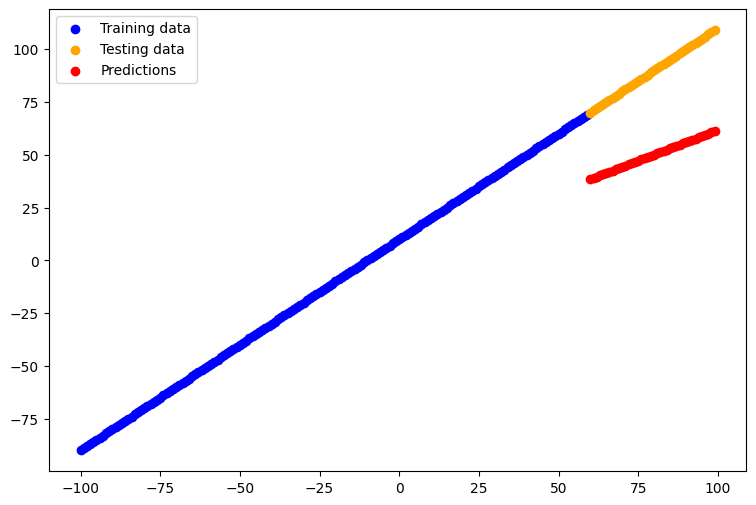

In [ ]:
plot_predictions()

### Evaluation the model's predict with regression evaluation metrics

`MAE` , `MSE`

In [ ]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0161 - mse: 0.0161


[0.016100740060210228, 0.016100740060210228]

In [ ]:
# MAE
list_1 = []
y_pred = tf.constant(y_pred)[..., tf.newaxis]
y_test = tf.cast(tf.constant(y_test), dtype=tf.float32)
for item in range(0, len(y_test)):
  mae = tf.reduce_mean(abs(y_test[item]-y_pred[item]))
  list_1.append(mae)

tf.reduce_mean(list_1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.11116524>

In [ ]:
tf.keras.losses.mae(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.11116524>

In [ ]:
tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.11116524>

In [ ]:
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.016100721>

In [ ]:
def mae(y_true=y_test, y_pred=None):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true=y_test, y_pred=None):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

In [ ]:
mae(y_test, y_pred), mse(y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.11116524>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.016100721>)

### Improve the model

1. Get molre data
2. Make your model larger
3. Train for longer

Model improvement experiments example:

>`model_1` -> same as original model - 1 dense layer, 100 epochs

>`model_2` ->  2 dense layer, 100 epochs

>`model_3` ->  2 dense layer, 500 epochs





In [ ]:
# model_1
# Data
x = tf.range(-100, 100, 4)
y = x + 12
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(name="model_1")
model_1.add(tf.keras.layers.Dense(1, activation=None))

# 2. Compile the model
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model_1.fit(x_train[..., tf.newaxis], y_train[..., tf.newaxis], epochs=100, verbose=0)

1/1 [==============================] - 0s 29ms/step


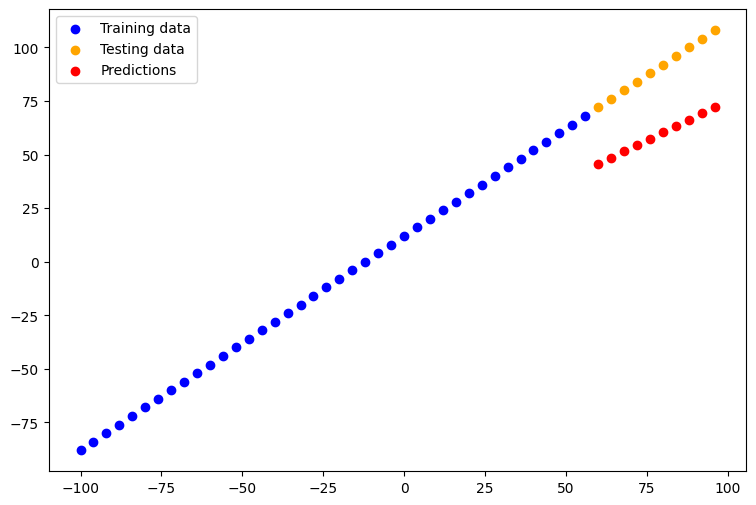

In [ ]:
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=31.074207>,
 <tf.Tensor: shape=(), dtype=float32, numpy=974.6746>)

In [ ]:
# model_2

tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential(name="model_2")
model_2.add(tf.keras.layers.Dense(10, activation=None))
model_2.add(tf.keras.layers.Dense(1, activation=None))

# 2. Compile the model
model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model_2.fit(x_train[..., tf.newaxis], y_train[..., tf.newaxis], epochs=100, verbose=0)

1/1 [==============================] - 0s 61ms/step


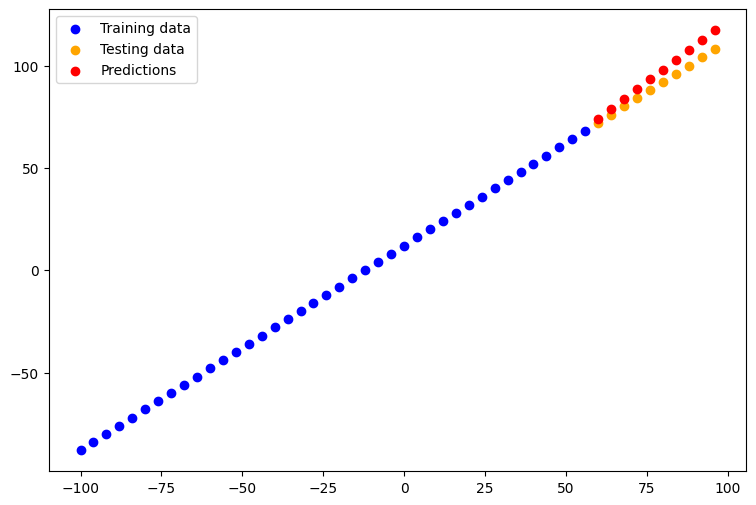

In [ ]:
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.619851>,
 <tf.Tensor: shape=(), dtype=float32, numpy=36.87435>)

In [ ]:
# model_3

tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(name="model_2")
model_3.add(tf.keras.layers.Dense(10, activation=None))
model_3.add(tf.keras.layers.Dense(1, activation=None))

# 2. Compile the model
model_3.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model_3.fit(x_train[..., tf.newaxis], y_train[..., tf.newaxis], epochs=500, verbose=0)

1/1 [==============================] - 0s 60ms/step


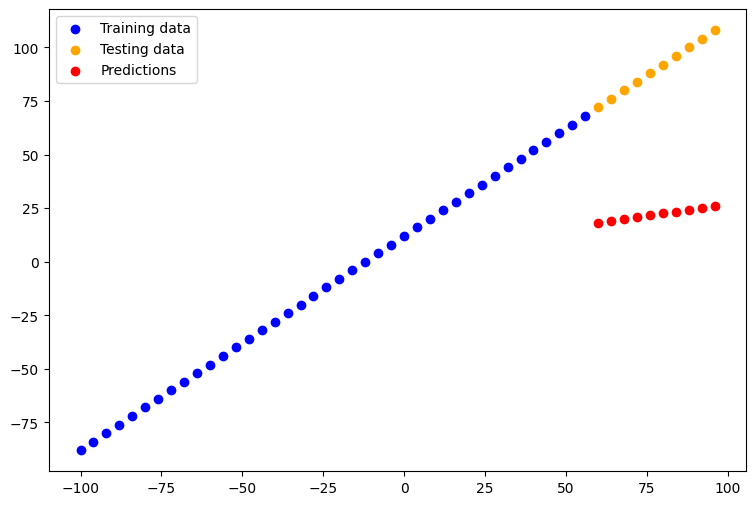

In [ ]:
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.86625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4687.1084>)

### Comparing the models

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

df_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
df_results

,model,mae,mse
0,model_1,31.074207,974.674622
1,model_2,5.619851,36.874352
2,model_3,67.866249,4687.108398


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Saving the model

In [ ]:
# SavedModel format
model_2.save("model_2_regression_savedModel_format")

In [ ]:
# HDF5 format
model_2.save("model_2_regression_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in the saved model

In [ ]:
loaded_model_2 = tf.keras.models.load_model("/content/model_2_regression_savedModel_format")
loaded_model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_2_loaded = loaded_model_2.predict(x_test)
print(y_pred_2_loaded == y_pred_2)
print(mae(y_test, y_pred_2_loaded) == mae(y_test, y_pred_2))
print(mse(y_test, y_pred_2_loaded) == mse(y_test, y_pred_2))

1/1 [==============================] - 0s 23ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)


In [ ]:
loaded_model_2_h5format = tf.keras.models.load_model("/content/model_2_regression_HDF5_format.h5")
loaded_model_2_h5format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_2_h5 = loaded_model_2_h5format.predict(x_test)
print(y_pred_2_h5 == y_pred_2)
print(mae(y_test, y_pred_2_h5) == mae(y_test, y_pred_2))
print(mse(y_test, y_pred_2_h5) == mse(y_test, y_pred_2))

1/1 [==============================] - 0s 148ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)


In [ ]:
# Download file from Google Colab
# from google.colab import files
# files.download("/content/model_2_regression_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save file from Google Colab to Google Drive(after mount drive)
#!cp /content/model_2_regression_HDF5_format.h5 /content/drive/MyDrive/ColabNotebooks/TensorFlowUdemy

In [ ]:
!ls /content/drive/MyDrive/ColabNotebooks/TensorFlowUdemy

neural_network_regression_in_tensorflow.ipynb  tensorflow_fundamentals.ipynb


## New and lager example

In [ ]:
# Impoert required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the insurance dataset
insurance_df = pd.read_csv("/content/insurance.csv")
insurance_df.head(), len(insurance_df)

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 1338)

In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# categorical features to numerical features
# print(insurance_df["sex"].replace({"male": 0, "female": 1})[:5])
# print(insurance_df["smoker"].replace({"yes": 1, "no": 0})[:5])
# print(insurance_df["region"].replace({"southwest": 0, "northwest": 1,
#                                       "southeast": 2, "northeast": 3})[:])

In [ ]:
insurance_df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# categorical features to numerical features
insurance_df_oneHot = pd.get_dummies(insurance_df)
insurance_df_oneHot[:5]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y (fetures and labels)
X = insurance_df_oneHot.drop("charges", axis=1)
y = insurance_df_oneHot["charges"]

In [ ]:
X[:3], len(X), y[:3], len(y)

(   age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.90         0           1         0          0           1   
 1   18  33.77         1           0         1          1           0   
 2   28  33.00         3           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  ,
 1338,
 0    16884.9240
 1     1725.5523
 2     4449.4620
 Name: charges, dtype: float64,
 1338)

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"X {len(X)},X.shape {X.shape}, X_train {len(X_train)}, X_test {len(X_test)}")
print(f"y {len(y)},y.shape {y.shape}, y_train {len(y_train)}, y_test {len(y_test)}")

X 1338,X.shape (1338, 11), X_train 1070, X_test 268
y 1338,y.shape (1338,), y_train 1070, y_test 268


In [ ]:
X_train[:10], y_train[:10]

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 170    63  41.470         0           0         1          1           0   
 277    22  24.300         0           1         0          1           0   
 1033   18  21.565         0           0         1          0           1   
 209    40  41.230         1           0         1          1           0   
 947    37  34.200         1           0         1          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 560                  0                 1                 0            

In [ ]:
# Build the regression neural network model
tf.random.set_seed(42)

# 1.Create the model
model_1 = tf.keras.Sequential(name="model_1")
model_1.add(tf.keras.layers.Dense(10, activation=None))
model_1.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the modeh
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8555.8984 - mae: 8555.8984
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7882.5737 - mae: 7882.5737
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.1948 - mae: 7565.1948
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7670.2812 - mae: 7670.2812
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7712.0298 - mae: 7712.0298
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.0000 - mae: 7612.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7653.9038 - mae: 7653.9038
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7766.4312 - mae: 7766.4312
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7455.8965 - mae: 7455.8965
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7718.9424 - mae: 7718.9424

In [ ]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8109.5449 - mae: 8109.5449


[8109.544921875, 8109.544921875]

Improve the model
 > `model_2` -> 3 layers with more hidden units -  Adam optimizer with lr=0.001 as default

 > `model_3` -> 3 layers -  Adam optimizer with lr=0.001 as default - 500 epochs

 > `model_4` -> 4 layers - Adam optimizer with lr=0.001 as default  125 epochs

In [ ]:
# model_2
tf.random.set_seed(42)

# 1.Create the model
model_2 = tf.keras.Sequential(name="model_2")
model_2.add(tf.keras.layers.Dense(100, activation=None))
model_2.add(tf.keras.layers.Dense(10, activation=None))
model_2.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the modeh
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13307.4102 - mae: 13307.4102
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13153.8936 - mae: 13153.8936
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12831.7832 - mae: 12831.7832
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12183.9463 - mae: 12183.9463
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11081.2021 - mae: 11081.2021
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9643.1982 - mae: 9643.1982
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8289.1729 - mae: 8289.1729
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.7939 - mae: 7578.7939
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7445.1880 - mae: 7445.1880
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7423.1963 - mae:

In [ ]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4838.1147 - mae: 4838.1147


[4838.11474609375, 4838.11474609375]

In [ ]:
from keras.src.callbacks import History
# model_3
tf.random.set_seed(42)

# 1.Create the model
model_3 = tf.keras.Sequential(name="model_3")
model_3.add(tf.keras.layers.Dense(100, activation=None))
model_3.add(tf.keras.layers.Dense(10, activation=None))
model_3.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the modeh
history = model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13285.6670 - mae: 13285.6670
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13130.3066 - mae: 13130.3066
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12793.4873 - mae: 12793.4873
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12123.4111 - mae: 12123.4111
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10998.3945 - mae: 10998.3945
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9560.6562 - mae: 9560.6562
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8229.8262 - mae: 8229.8262
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7556.9136 - mae: 7556.9136
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7437.9478 - mae: 7437.9478
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7417.3135 - mae:

In [ ]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5728 - mae: 3170.5728


[3170.57275390625, 3170.57275390625]

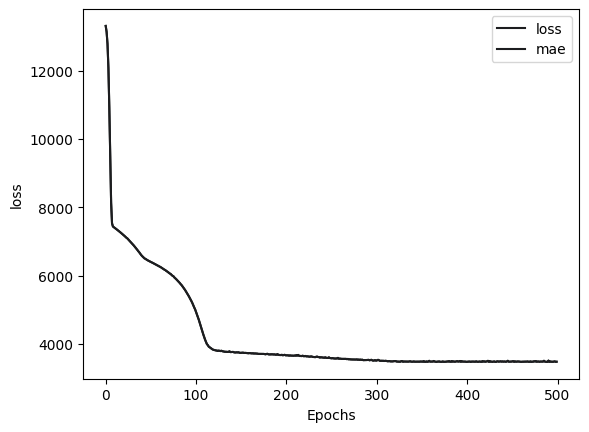

In [ ]:
# Plot history
pd.DataFrame(history.history).plot(color="#1C1D1F")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# model_4
tf.random.set_seed(42)

# 1.Create the model
model_4 = tf.keras.Sequential(name="model_4")
model_4.add(tf.keras.layers.Dense(100, activation=None))
model_4.add(tf.keras.layers.Dense(100, activation=None))
model_4.add(tf.keras.layers.Dense(10, activation=None))
model_4.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the modeh
model_4.fit(X_train, y_train, epochs=125)

Epoch 1/125
34/34 [==============================] - 1s 3ms/step - loss: 13090.7070 - mae: 13090.7070
Epoch 2/125
34/34 [==============================] - 0s 3ms/step - loss: 11109.7881 - mae: 11109.7881
Epoch 3/125
34/34 [==============================] - 0s 3ms/step - loss: 7615.4629 - mae: 7615.4629
Epoch 4/125
34/34 [==============================] - 0s 2ms/step - loss: 7362.6328 - mae: 7362.6328
Epoch 5/125
34/34 [==============================] - 0s 2ms/step - loss: 7286.8540 - mae: 7286.8540
Epoch 6/125
34/34 [==============================] - 0s 2ms/step - loss: 7211.6089 - mae: 7211.6089
Epoch 7/125
34/34 [==============================] - 0s 2ms/step - loss: 7128.2593 - mae: 7128.2593
Epoch 8/125
34/34 [==============================] - 0s 2ms/step - loss: 7040.3125 - mae: 7040.3125
Epoch 9/125
34/34 [==============================] - 0s 2ms/step - loss: 6948.0767 - mae: 6948.0767
Epoch 10/125
34/34 [==============================] - 0s 2ms/step - loss: 6853.7651 - mae: 6853.

In [ ]:
# Evaluate the model
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3217.2212 - mae: 3217.2212


[3217.22119140625, 3217.22119140625]

### Preprocessing data (normalizaton and standardization)

Neural network prefers normalization

> normalization ---> `MinMaxScaler` in sklearn

> standardization ---> `StandardScaler` in sklearn

In [ ]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance_df = pd.read_csv("/content/insurance.csv")

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # normalize the numerical features
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y (features and labels)
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# Create Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the column transformer to the training data
ct.fit_transform(X_train)

# # Transform (change) training and test data normalization (`MinMaxScaler`) and `OneHotEncoding`
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
type(X_train), X_train.loc[0]

(pandas.core.frame.DataFrame,
 age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object)

In [ ]:
type(X_train_normal), X_train_normal[0]

(numpy.ndarray,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build neural network model with normalized data based model_4
# model_5
import tensorflow as tf

tf.random.set_seed(42)

# 1.Create the model
model_5 = tf.keras.Sequential(name="model_5")
model_5.add(tf.keras.layers.Dense(100, activation=None))
model_5.add(tf.keras.layers.Dense(100, activation=None))
model_5.add(tf.keras.layers.Dense(10, activation=None))
model_5.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the modeh
model_5.fit(X_train_normal, y_train, epochs=125)

Epoch 1/125
34/34 [==============================] - 1s 2ms/step - loss: 13338.7441 - mae: 13338.7441
Epoch 2/125
34/34 [==============================] - 0s 2ms/step - loss: 13261.0469 - mae: 13261.0469
Epoch 3/125
34/34 [==============================] - 0s 3ms/step - loss: 12838.4258 - mae: 12838.4258
Epoch 4/125
34/34 [==============================] - 0s 2ms/step - loss: 11453.1748 - mae: 11453.1748
Epoch 5/125
34/34 [==============================] - 0s 2ms/step - loss: 9215.8154 - mae: 9215.8154
Epoch 6/125
34/34 [==============================] - 0s 2ms/step - loss: 7990.3540 - mae: 7990.3540
Epoch 7/125
34/34 [==============================] - 0s 2ms/step - loss: 7782.0522 - mae: 7782.0522
Epoch 8/125
34/34 [==============================] - 0s 2ms/step - loss: 7610.2827 - mae: 7610.2827
Epoch 9/125
34/34 [==============================] - 0s 2ms/step - loss: 7436.4736 - mae: 7436.4736
Epoch 10/125
34/34 [==============================] - 0s 2ms/step - loss: 7242.8711 - mae: 7

In [ ]:
# Evaluate the models
print(model_5.evaluate(X_test_normal, y_test))

9/9 [==============================] - 0s 3ms/step - loss: 3160.7473 - mae: 3160.7473
[3160.747314453125, 3160.747314453125]


In [ ]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance_df = pd.read_csv("/content/insurance.csv")

# Create a column transformer
ct = make_column_transformer(
    (StandardScaler(), ["age", "bmi", "children"]), # normalize the numerical features
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y (features and labels)
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

# Create Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the column transformer to the training data
ct.fit_transform(X_train)

# # Transform (change) training and test data normalization (`MinMaxScaler`) and `OneHotEncoding`
X_train_standard = ct.transform(X_train)
X_test_standard= ct.transform(X_test)

In [ ]:
# Build neural network model with standardization data based model_4
# model_6
import tensorflow as tf

tf.random.set_seed(42)

# 1.Create the model
model_6 = tf.keras.Sequential(name="model_6")
model_6.add(tf.keras.layers.Dense(100, activation=None))
model_6.add(tf.keras.layers.Dense(100, activation=None))
model_6.add(tf.keras.layers.Dense(10, activation=None))
model_6.add(tf.keras.layers.Dense(1, activation=None))

# 2.Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the modeh
model_6.fit(X_train_standard, y_train, epochs=125)

Epoch 1/125
34/34 [==============================] - 3s 5ms/step - loss: 13337.9014 - mae: 13337.9014
Epoch 2/125
34/34 [==============================] - 0s 5ms/step - loss: 13260.9893 - mae: 13260.9893
Epoch 3/125
34/34 [==============================] - 0s 6ms/step - loss: 12864.2715 - mae: 12864.2715
Epoch 4/125
34/34 [==============================] - 0s 6ms/step - loss: 11610.4492 - mae: 11610.4492
Epoch 5/125
34/34 [==============================] - 0s 4ms/step - loss: 9478.6387 - mae: 9478.6387
Epoch 6/125
34/34 [==============================] - 0s 4ms/step - loss: 7870.5176 - mae: 7870.5176
Epoch 7/125
34/34 [==============================] - 0s 5ms/step - loss: 7398.3550 - mae: 7398.3550
Epoch 8/125
34/34 [==============================] - 0s 6ms/step - loss: 7003.2744 - mae: 7003.2744
Epoch 9/125
34/34 [==============================] - 0s 4ms/step - loss: 6592.1821 - mae: 6592.1821
Epoch 10/125
34/34 [==============================] - 0s 3ms/step - loss: 6143.1304 - mae: 6

In [ ]:
# Evaluate the models
print(model_6.evaluate(X_test_standard, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 3156.3953 - mae: 3156.3953
[3156.395263671875, 3156.395263671875]
